Saving Electric_Production (1).csv to Electric_Production (1) (1).csv


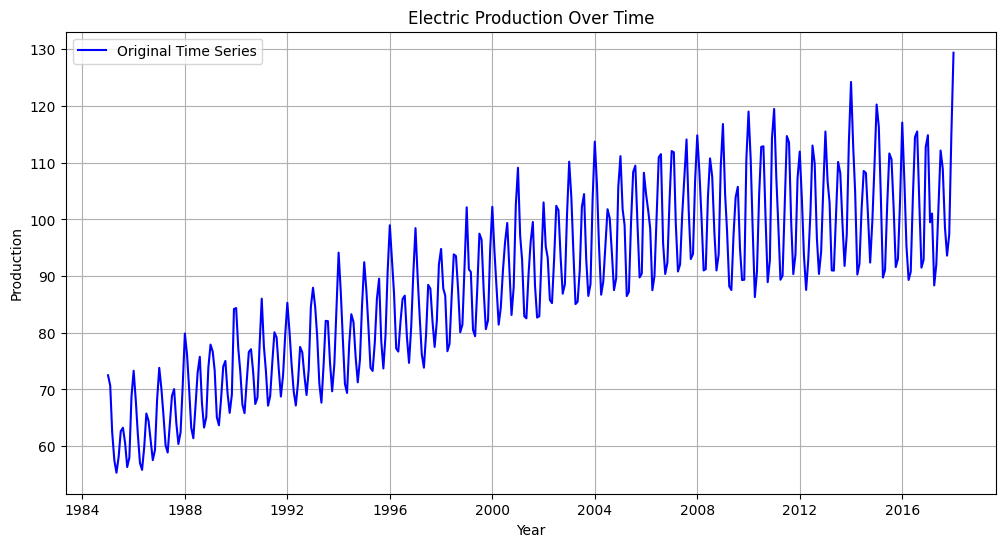

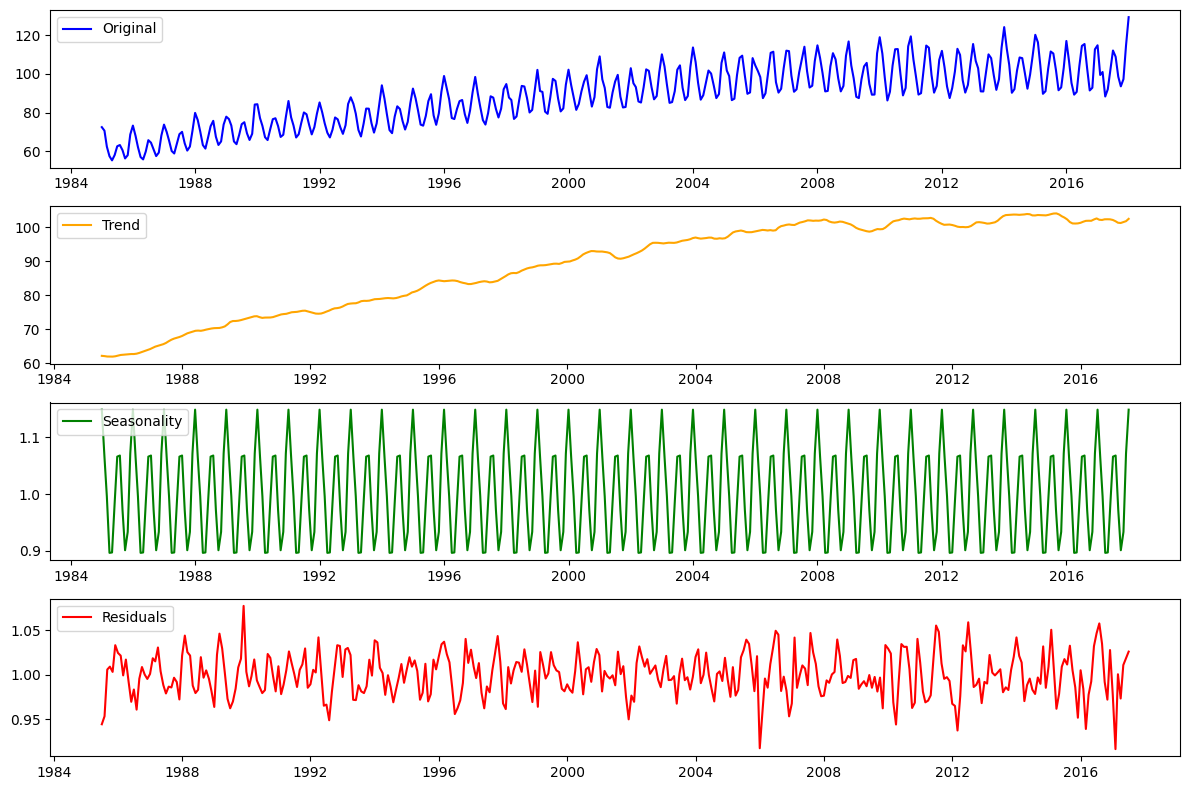

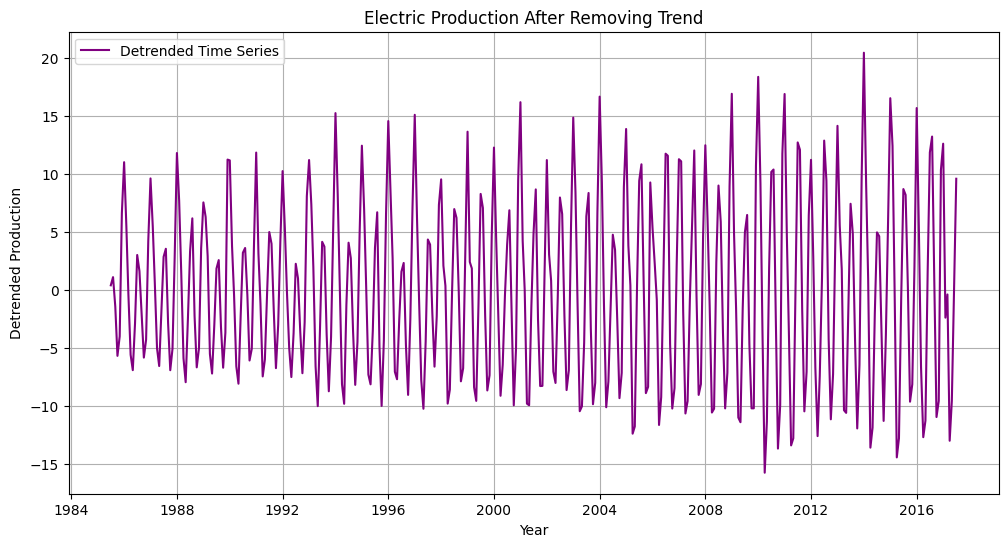

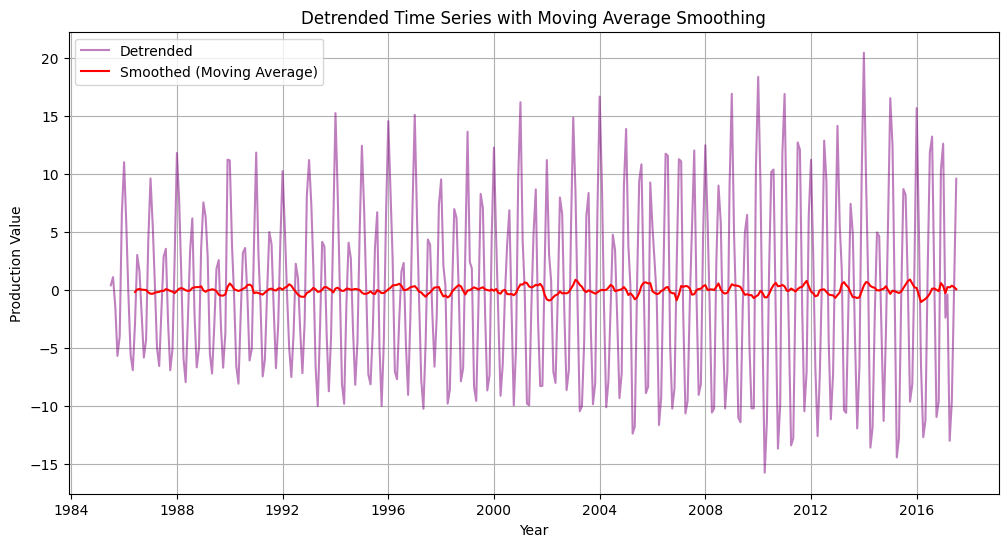

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


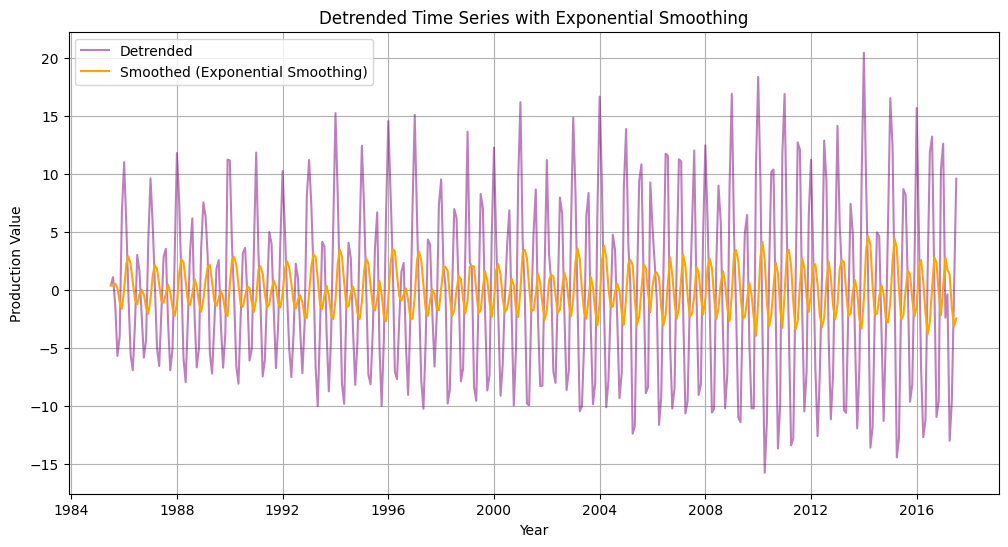

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from google.colab import files

# 1️⃣ Upload Dataset in Google Colab
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)

# Convert DATE column to datetime (Modify this if your column name is different)
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.rename(columns={'IPG2211A2N': 'Production'}, inplace=True)  # Rename column for clarity

# 2️⃣ Visualize the Original Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Production'], label='Original Time Series', color='blue')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Electric Production Over Time')
plt.legend()
plt.grid()
plt.show()

# 3️⃣ Apply Seasonal Decomposition
decomposition = seasonal_decompose(df['Production'], model='multiplicative', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 4️⃣ Plot Decomposed Components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Production'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 5️⃣ Eliminate Trend by Detrending (Subtracting Trend Component)
df['Detrended'] = df['Production'] - trend

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Detrended'], label='Detrended Time Series', color='purple')
plt.xlabel('Year')
plt.ylabel('Detrended Production')
plt.title('Electric Production After Removing Trend')
plt.legend()
plt.grid()
plt.show()

# 6️⃣ Apply Moving Average Smoothing
df['Smoothed_MA'] = df['Detrended'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Detrended'], label='Detrended', alpha=0.5, color='purple')
plt.plot(df.index, df['Smoothed_MA'], label='Smoothed (Moving Average)', color='red')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.title('Detrended Time Series with Moving Average Smoothing')
plt.legend()
plt.grid()
plt.show()

# 7️⃣ Apply Exponential Smoothing
df['Smoothed_Exp'] = SimpleExpSmoothing(df['Detrended'].dropna()).fit(smoothing_level=0.2, optimized=False).fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Detrended'], label='Detrended', alpha=0.5, color='purple')
plt.plot(df.index, df['Smoothed_Exp'], label='Smoothed (Exponential Smoothing)', color='orange')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.title('Detrended Time Series with Exponential Smoothing')
plt.legend()
plt.grid()
plt.show()
